# Algoritmo de Canny

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

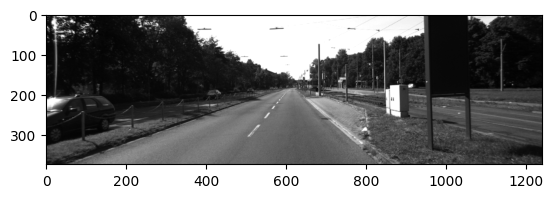

In [35]:
image = cv2.imread('../../IMAGES/DATASET_IMAGES/KITII/testing/um_000000.png', 0)
img = np.copy(image)
wid, hght = img.shape
plt.imshow(image,  cmap='gray')

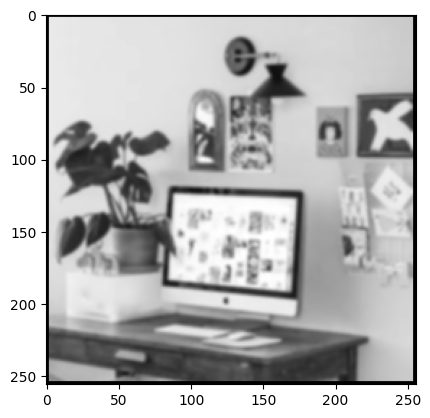

In [4]:
gauss = [[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]]
kernel_gauss = np.divide(gauss, 256)
newImage_gauss = convolucion(img,hght, wid, kernel_gauss,5)
plt.imshow(newImage_gauss, cmap='gray')

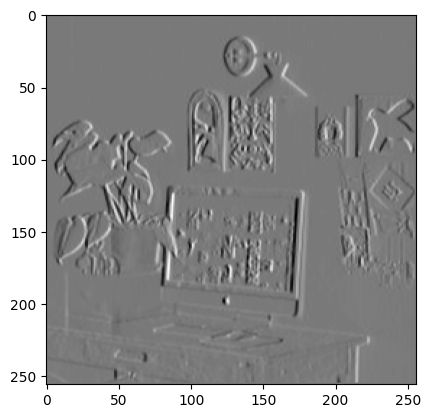

In [5]:
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
newImage_sobel_x = convolucion(img,hght, wid, kernel_sobel_x,3)
plt.imshow(newImage_sobel_x, cmap='gray')

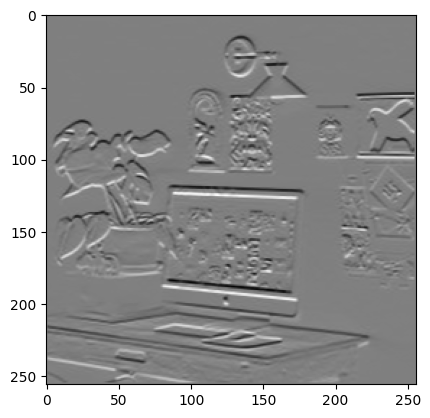

In [6]:
kernel_sobel_y = [[-1, -2, -1],[0, 0, 0],[1, 2, 1]]
newImage_sobel_y = convolucion(img,hght, wid, kernel_sobel_y,3)
plt.imshow(newImage_sobel_y, cmap='gray')

In [7]:
def canny(image, low_threshold, high_threshold):
    # Paso 1: Suavizado de la imagen
    image = newImage_gauss

    # Paso 2: Cálculo de gradientes (Sobel)
    gradient_x = newImage_sobel_x
    gradient_y = newImage_sobel_y

    # Magnitud del gradiente y dirección
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    # Paso 3: Supresión de no máximos
    gradient_magnitude_suppressed = np.copy(gradient_magnitude)

    for i in range(1, wid - 1):
        for j in range(1, hght - 1):
            angle = gradient_direction[i, j]
            mag = gradient_magnitude_suppressed[i, j]
            
            # Definir los índices de los píxeles vecinos
            i_n, j_n = i, j

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180) or (-22.5 <= angle < 0) or (-180 <= angle < -157.5):
                j_n += 1
            elif (22.5 <= angle < 67.5) or (-157.5 <= angle < -112.5):
                i_n -= 1
                j_n += 1
            elif (67.5 <= angle < 112.5) or (-112.5 <= angle < -67.5):
                i_n -= 1
            elif (112.5 <= angle < 157.5) or (-67.5 <= angle < -22.5):
                i_n -= 1
                j_n -= 1

            # Comprobar si el píxel actual es un máximo local
            if mag < gradient_magnitude_suppressed[i_n:i_n+2, j_n:j_n+2].max():
                gradient_magnitude_suppressed[i, j] = 0

    # Umbralización (Hysteresis)
    edges = np.zeros((wid, hght))
    strong_edge_i, strong_edge_j = np.where(gradient_magnitude_suppressed > high_threshold)
    weak_edge_i, weak_edge_j = np.where((gradient_magnitude_suppressed >= low_threshold) & (gradient_magnitude_suppressed <= high_threshold))

    edges[strong_edge_i, strong_edge_j] = 255

    for idx in range(len(weak_edge_i)):
        i, j = weak_edge_i[idx], weak_edge_j[idx]
        if np.any(edges[i-1:i+2, j-1:j+2] == 255):
            edges[i, j] = 255

    return edges.astype(np.uint8)

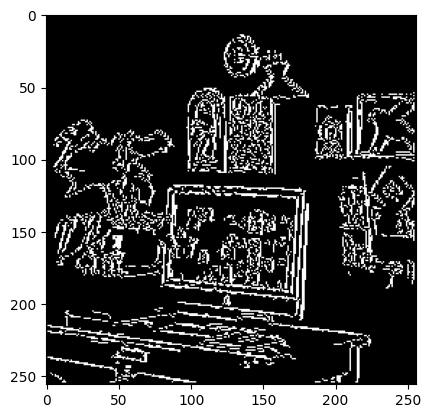

In [8]:
img_canny = canny(img, 50, 150)
plt.imshow(img_canny, cmap='gray')

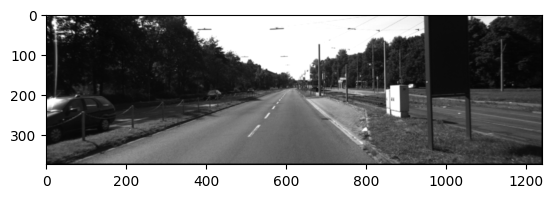

In [36]:
def suavizado(img):
    gauss = [
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ]

    # Dividir el kernel entre la suma (256)
    gauss2 = np.divide(gauss, 256)

    forma = np.shape(img)
    gaussiano2 = np.zeros(forma)

    # Suavizado gaussiano
    for x in list(range(1, forma[0]-1)):
        for y in list(range(1, forma[1]-1)):
            suma = 0
            for i in list(range(-1, 2)):
                for j in list(range(-1, 2)):
                    suma = img[x-i, y-j] * gauss2[i+1, j+1]+suma
            gaussiano2[x, y] = suma
    maxs = np.max(gaussiano2)
    gaussiano2 = gaussiano2*255/maxs
    gaussiano2 = gaussiano2.astype(np.uint8)
    return gaussiano2

# Crear kernel gaussiano
gaussian = suavizado(img)
plt.imshow(gaussian, cmap='gray')

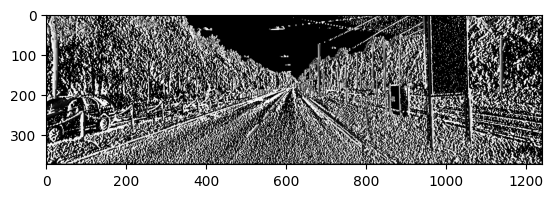

In [41]:
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

def convolucion(img, kernel):

    forma = np.shape(img)
    base = np.zeros(forma)

    for x in list(range(1, forma[0]-1)):
        for y in list(range(1, forma[1]-1)):
            suma = 0
            for i in list(range(-1, 2)):
                for j in list(range(-1, 2)):
                    suma = img[x-i, y-j] * kernel[i+1, j+1]+suma
            base[x, y] = suma
    maxs = np.max(base)
    base = base*255/maxs
    base = base.astype(np.uint8)
    return base

img_conv = convolucion(img, kernel_sobel_x)
plt.imshow(img_conv, cmap='gray')

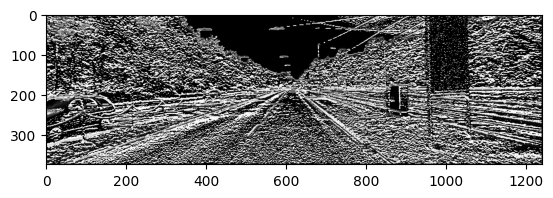

In [42]:
img_conv_y = convolucion(img, kernel_sobel_y)
plt.imshow(img_conv_y, cmap='gray')

In [ ]:
x = 2